In [18]:
import sklearn.model_selection
from sklearn.datasets import fetch_openml
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from autosklearn.classification import AutoSklearnClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


X, y = fetch_openml(data_id=40691, as_frame=True, return_X_y=True)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=42)


# Dataset
The dataset is wine quality dataset from UCI Machine Learning Repository. The dataset consists of 11 features and 1 target variable. The target variable is the quality of the wine which is a score between 3 and 8. The features are as follows:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Shape of the dataset is (1599, 12) and there are no missing values in the dataset.

In [2]:
X.isnull().sum(), y.isnull()

(fixed_acidity           0
 volatile_acidity        0
 citric_acid             0
 residual_sugar          0
 chlorides               0
 free_sulfur_dioxide     0
 total_sulfur_dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 dtype: int64,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 1594    False
 1595    False
 1596    False
 1597    False
 1598    False
 Name: class, Length: 1599, dtype: bool)

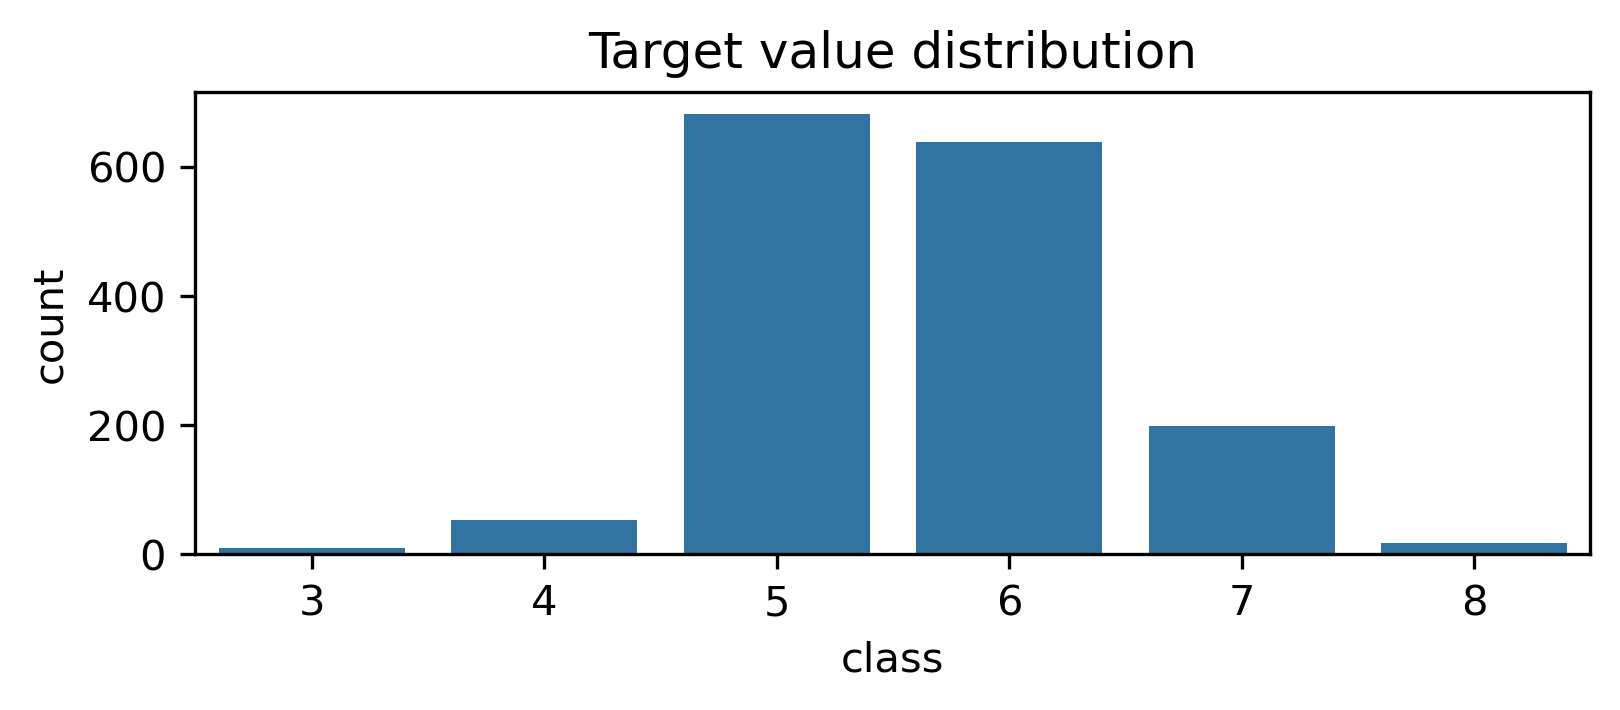

In [17]:
plt.figure(figsize=(6, 2), dpi=300)
plt.title('Target value distribution')
sns.barplot(y.value_counts())
plt.show()

In [64]:
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
rf_accuracy = sklearn.metrics.accuracy_score(y_test, y_hat)
print("RF Accuracy", rf_accuracy)

RF Accuracy 0.67


In [32]:
%time
automl_v1 = AutoSklearnClassifier(
    seed=42,
    time_left_for_this_task=300,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 10},
    memory_limit=204800,
    )
automl_v1.fit(X_train, y_train)
y_hat = automl_v1.predict(X_test)
accuracy_automl_v1 = sklearn.metrics.accuracy_score(y_test, y_hat)
print("AutoML Accuracy", accuracy_automl_v1)

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 19.3 µs


/home/farshad/miniforge3/envs/venv/lib/python3.9/site-packages/autosklearn/data/target_validator.py:187: UserWarning: Fitting transformer with a pandas series which has the dtype category. Inverse transform may not be able preserve dtype when converting to np.ndarray
  warnings.warn(


AutoML Accuracy 0.67


In [34]:
%time
automl_v2 = AutoSklearnClassifier(
    seed=42,
    time_left_for_this_task=300,
    resampling_strategy='cv',
    memory_limit=204800,
    )
automl_v2.fit(X_train, y_train)
y_hat = automl_v2.predict(X_test)
accuracy_automl_v2 = sklearn.metrics.accuracy_score(y_test, y_hat)
print("AutoML Accuracy", accuracy_automl_v2)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10.7 µs


/home/farshad/miniforge3/envs/venv/lib/python3.9/site-packages/autosklearn/data/target_validator.py:187: UserWarning: Fitting transformer with a pandas series which has the dtype category. Inverse transform may not be able preserve dtype when converting to np.ndarray
  warnings.warn(


AutoML Accuracy 0.68


In [33]:
%time
automl_v3 = AutoSklearnClassifier(
    seed=42,
    time_left_for_this_task=300,
    memory_limit=204800,
    )
automl_v3.fit(X_train, y_train)
y_hat = automl_v3.predict(X_test)
accuracy_automl_v3 = sklearn.metrics.accuracy_score(y_test, y_hat)
print("AutoML Accuracy", accuracy_automl_v3)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11.7 µs


/home/farshad/miniforge3/envs/venv/lib/python3.9/site-packages/autosklearn/data/target_validator.py:187: UserWarning: Fitting transformer with a pandas series which has the dtype category. Inverse transform may not be able preserve dtype when converting to np.ndarray
  warnings.warn(


AutoML Accuracy 0.6475


In [37]:
automl_v4 = AutoSklearnClassifier(
    seed=42,
    time_left_for_this_task=300,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 3},
    memory_limit=204800,
    )
automl_v4.fit(X_train, y_train)
y_hat = automl_v4.predict(X_test)
accuracy_automl_v4 = sklearn.metrics.accuracy_score(y_test, y_hat)
print("AutoML Accuracy", accuracy_automl_v4)

/home/farshad/miniforge3/envs/venv/lib/python3.9/site-packages/autosklearn/data/target_validator.py:187: UserWarning: Fitting transformer with a pandas series which has the dtype category. Inverse transform may not be able preserve dtype when converting to np.ndarray
  warnings.warn(


AutoML Accuracy 0.65


In [38]:
automl_v5 = AutoSklearnClassifier(
    seed=42,
    time_left_for_this_task=300,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 5},
    memory_limit=204800,
    )
automl_v5.fit(X_train, y_train)
y_hat = automl_v5.predict(X_test)
accuracy_automl_v5 = sklearn.metrics.accuracy_score(y_test, y_hat)
print("AutoML Accuracy", accuracy_automl_v5)

/home/farshad/miniforge3/envs/venv/lib/python3.9/site-packages/autosklearn/data/target_validator.py:187: UserWarning: Fitting transformer with a pandas series which has the dtype category. Inverse transform may not be able preserve dtype when converting to np.ndarray
  warnings.warn(


AutoML Accuracy 0.68


In [39]:
automl_v6 = AutoSklearnClassifier(
    seed=42,
    time_left_for_this_task=300,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 7},
    memory_limit=204800,
    )
automl_v6.fit(X_train, y_train)
y_hat = automl_v6.predict(X_test)
accuracy_automl_v6 = sklearn.metrics.accuracy_score(y_test, y_hat)
print("AutoML Accuracy", accuracy_automl_v6)

/home/farshad/miniforge3/envs/venv/lib/python3.9/site-packages/autosklearn/data/target_validator.py:187: UserWarning: Fitting transformer with a pandas series which has the dtype category. Inverse transform may not be able preserve dtype when converting to np.ndarray
  warnings.warn(


AutoML Accuracy 0.68


In [61]:
automl_v2.sprint_statistics().split('\n')[3].split(' ')[-1]

'0.678899'

In [65]:
results = {
    'RF': [rf_accuracy, None],
    'AutoML': [accuracy_automl_v3, float(automl_v3.sprint_statistics().split('\n')[3].split(' ')[-1])],
    'AutoML with CV': [accuracy_automl_v2, float(automl_v2.sprint_statistics().split('\n')[3].split(' ')[-1])],
    '3 folds': [accuracy_automl_v4, float(automl_v4.sprint_statistics().split('\n')[3].split(' ')[-1])],
    '5 folds': [accuracy_automl_v5, float(automl_v5.sprint_statistics().split('\n')[3].split(' ')[-1])],
    '7 folds': [accuracy_automl_v6, float(automl_v6.sprint_statistics().split('\n')[3].split(' ')[-1])],
    '10 folds': [accuracy_automl_v1, float(automl_v1.sprint_statistics().split('\n')[3].split(' ')[-1])],
}

In [47]:
print(f'Auto-Sklearn: {automl_v3.sprint_statistics()}, Accuracy: {accuracy_automl_v3}')
print(f'Auto-Sklearn with CV: {automl_v2.sprint_statistics()}, Accuracy: {accuracy_automl_v2}')
print(f'Auto-Sklearn with CV and 3 Folds: {automl_v4.sprint_statistics()}, Accuracy: {accuracy_automl_v4}')
print(f'Auto-Sklearn with CV and 5 Folds: {automl_v5.sprint_statistics()}, Accuracy: {accuracy_automl_v5}')
print(f'Auto-Sklearn with CV and 7 Folds: {automl_v6.sprint_statistics()}, Accuracy: {accuracy_automl_v6}')
print(f'Auto-Sklearn with CV and 10 Folds: {automl_v1.sprint_statistics()}, Accuracy: {accuracy_automl_v1}')

Auto-Sklearn with CV: auto-sklearn results:
  Dataset name: 07329a30-08f2-11ef-8d42-04421af025cc
  Metric: accuracy
  Best validation score: 0.678899
  Number of target algorithm runs: 48
  Number of successful target algorithm runs: 26
  Number of crashed target algorithm runs: 20
  Number of target algorithms that exceeded the time limit: 2
  Number of target algorithms that exceeded the memory limit: 0
, Accuracy: 0.68
Auto-Sklearn: auto-sklearn results:
  Dataset name: 533e255f-08f1-11ef-8d42-04421af025cc
  Metric: accuracy
  Best validation score: 0.699495
  Number of target algorithm runs: 84
  Number of successful target algorithm runs: 62
  Number of crashed target algorithm runs: 21
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0
, Accuracy: 0.6475
Auto-Sklearn with CV and 3 Folds: auto-sklearn results:
  Dataset name: 8096c058-08f3-11ef-8d42-04421af025cc
  Metric: accuracy
  Best validation score: 0

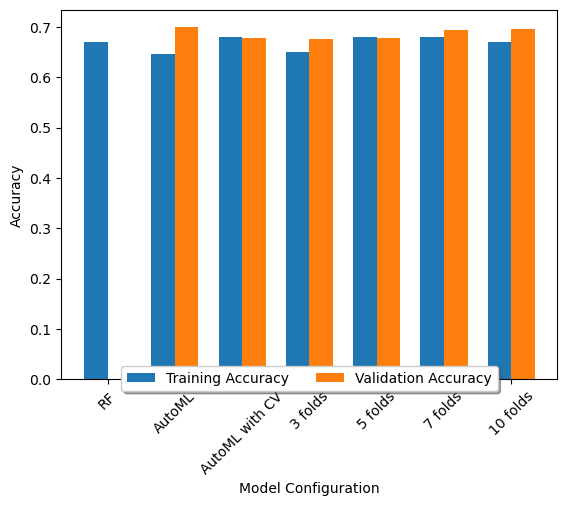

In [72]:
# Labels and values
labels = list(results.keys())
train_acc = [x[0] if x[0] is not None else 0 for x in results.values()]
validation_acc = [x[1] if x[1] is not None else 0 for x in results.values()]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(labels))

bar1 = ax.bar(index, train_acc, bar_width, label='Training Accuracy')
bar2 = ax.bar([p + bar_width for p in index], validation_acc, bar_width, label='Validation Accuracy')

ax.set_xlabel('Model Configuration')
ax.set_ylabel('Accuracy')
ax.set_xticks([p + bar_width / 2 for p in index])
ax.set_xticklabels(labels)
ax.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, -0.05),
    shadow=True,
    ncol=2
)

plt.xticks(rotation=45)
plt.show()

In [43]:
run_key = list(automl_v1.automl_.runhistory_.data.keys())[0]
run_value = automl_v1.automl_.runhistory_.data[run_key]

In [44]:
print("Cost:", run_value.cost)
print("Time:", run_value.time)
print("Status:", run_value.status)
print("Additional information:", run_value.additional_info)
print("Start time:", run_value.starttime)
print("End time", run_value.endtime)

Cost: 0.3035863219349458
Time: 13.240779638290405
Status: StatusType.SUCCESS
Additional information: {'duration': 12.47315001487732, 'num_run': 2, 'train_loss': 0.0, 'configuration_origin': 'Initial design'}
Start time: 1714701485.8369796
End time 1714701499.2383363


In [46]:
automl_v1.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
2,1,0.36,random_forest,0.303586,13.240780
4,2,0.06,random_forest,0.311093,10.808181
26,3,0.02,random_forest,0.327773,15.447573
9,4,0.02,gradient_boosting,0.370309,10.660351
14,5,0.02,random_forest,0.371977,12.692765
22,6,0.02,mlp,0.403670,4.670861
12,7,0.02,mlp,0.417848,15.963958
5,8,0.04,gradient_boosting,0.471226,4.616070
21,9,0.44,qda,0.553795,2.661280


In [48]:
automl_v3.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
36,1,0.06,random_forest,0.300505,1.611972
58,2,0.04,random_forest,0.303030,1.620678
40,3,0.02,random_forest,0.308081,1.730714
79,4,0.02,random_forest,0.310606,1.863038
53,5,0.02,random_forest,0.318182,1.711442
65,6,0.02,random_forest,0.320707,1.736429
35,7,0.02,random_forest,0.323232,3.332943
66,8,0.02,random_forest,0.333333,1.549958
61,9,0.04,random_forest,0.348485,1.898426
